# Segnale non difettoso



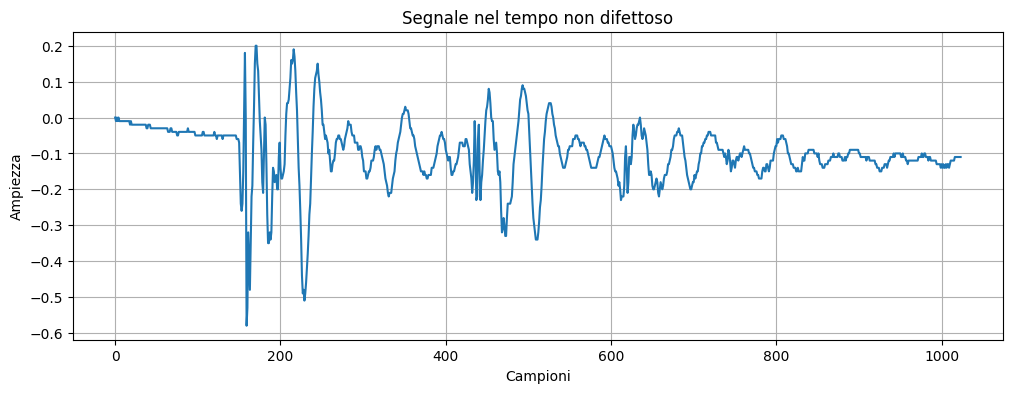

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Leggi il segnale dal file
file_path = '../dataset/test_object_1_1mm/A/A (2).txt'
signal = np.loadtxt(file_path)

# Crea l'asse temporale (1024 campioni)
n_samples = len(signal)
time = np.arange(n_samples)

# Oppure se conosci la frequenza di campionamento
# fs = 1000  # Hz (esempio)
# time = np.arange(n_samples) / fs

# Rappresenta il segnale
plt.figure(figsize=(12, 4))
plt.plot(time, signal)
plt.xlabel('Campioni')
plt.ylabel('Ampiezza')
plt.title('Segnale nel tempo non difettoso')
plt.grid(True)
plt.show()

# Segnale difettoso



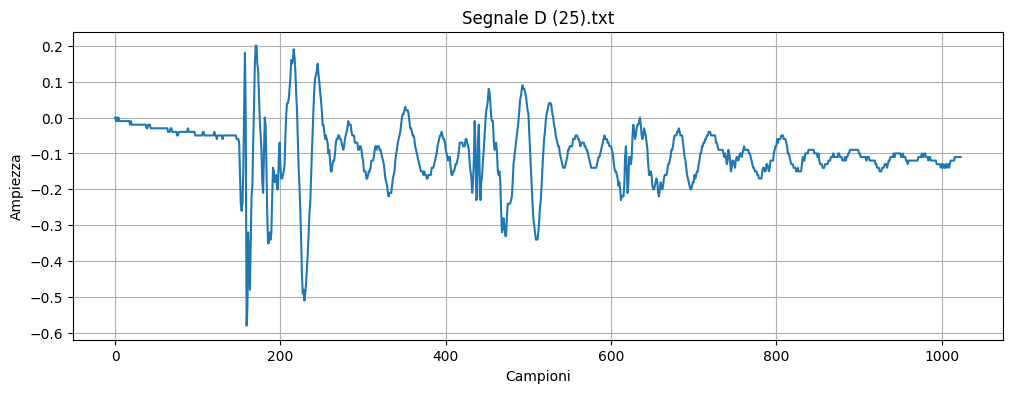

In [8]:
import sys
sys.path.append('../utils')
from getIndexesFromNumber import getIndexesFromNumber

# Leggi il segnale dal file
fileName = getIndexesFromNumber(145) + '.txt'
file_path = '../dataset/test_object_1_1mm/D/' + fileName

signalWithDefect = np.loadtxt(file_path)

# Crea l'asse temporale (1024 campioni)
n_samples = len(signalWithDefect)
time = np.arange(n_samples)

# Oppure se conosci la frequenza di campionamento
# fs = 1000  # Hz (esempio)
# time = np.arange(n_samples) / fs

# Rappresenta il segnale
plt.figure(figsize=(12, 4))
plt.plot(time, signal)
plt.xlabel('Campioni')
plt.ylabel('Ampiezza')
plt.title(f'Segnale {fileName}')
plt.grid(True)
plt.show()

# Analisi Tempo Frequenza

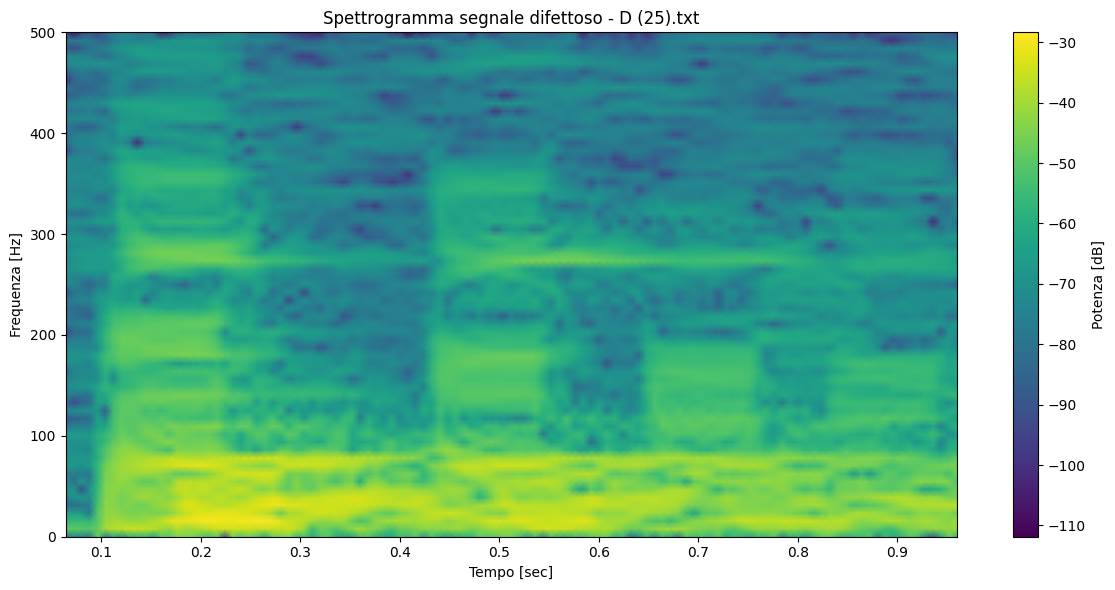

In [9]:
from scipy import signal as sig

# Parametri per lo spettrogramma
fs = 1000  # Frequenza di campionamento (da adattare ai tuoi dati)
nperseg = 128  # Lunghezza della finestra
noverlap = 120  # Overlap tra finestre

# Calcola lo spettrogramma
f, t, Sxx = sig.spectrogram(signalWithDefect, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Visualizza lo spettrogramma
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.ylabel('Frequenza [Hz]')
plt.xlabel('Tempo [sec]')
plt.title(f'Spettrogramma segnale difettoso - {fileName}')
plt.colorbar(label='Potenza [dB]')
plt.tight_layout()
plt.show()

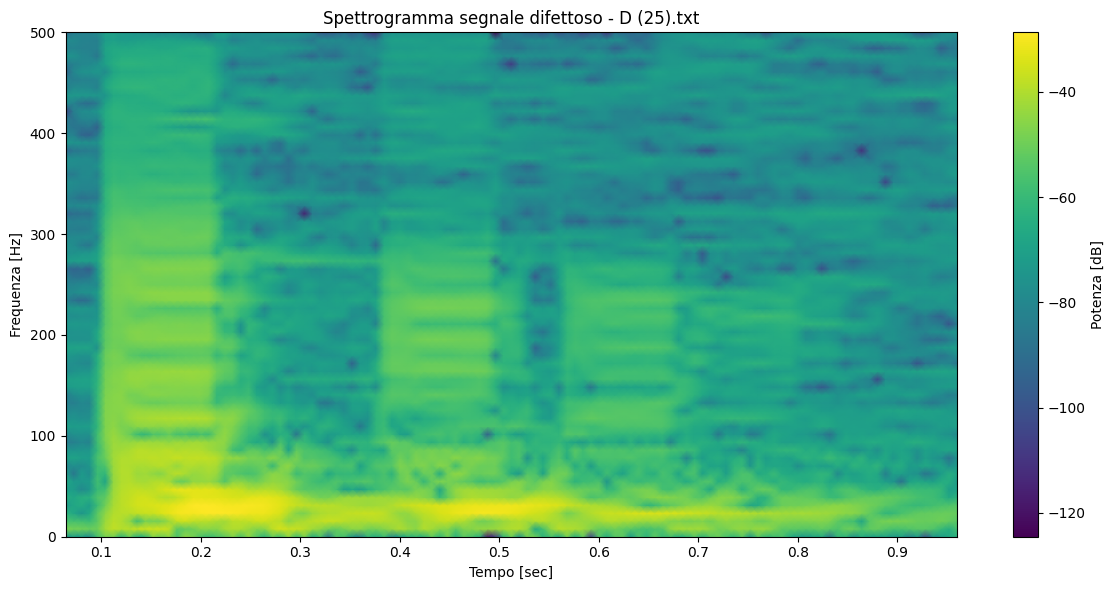

In [10]:

# Calcola lo spettrogramma
f, t, Sxx = sig.spectrogram(signal, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Visualizza lo spettrogramma
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.ylabel('Frequenza [Hz]')
plt.xlabel('Tempo [sec]')
plt.title(f'Spettrogramma segnale difettoso - {fileName}')
plt.colorbar(label='Potenza [dB]')
plt.tight_layout()
plt.show()

# Scala di MEL


In [12]:
import librosa
import librosa.display

# Parametri per il Mel-Spectrogram
n_fft = 256
hop_length = 128
n_mels = 128  # Numero di bande mel

# Calcola il Mel-Spectrogram per il segnale NON difettoso
mel_spec = librosa.feature.melspectrogram(
    y=signal, 
    sr=fs, 
    n_fft=n_fft,
    hop_length=hop_length,
    n_mels=n_mels
)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Visualizza il Mel-Spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_spec_db, sr=fs, hop_length=hop_length, 
                         x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(label='Potenza [dB]', format='%+2.0f dB')
plt.title('Mel-Spectrogram - Segnale NON difettoso')
plt.xlabel('Tempo [sec]')
plt.ylabel('Frequenza [Hz] (scala Mel)')
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'librosa'

In [ ]:
# Calcola il Mel-Spectrogram per il segnale DIFETTOSO
mel_spec_defect = librosa.feature.melspectrogram(
    y=signalWithDefect, 
    sr=fs, 
    n_fft=n_fft,
    hop_length=hop_length,
    n_mels=n_mels
)
mel_spec_defect_db = librosa.power_to_db(mel_spec_defect, ref=np.max)

# Visualizza il Mel-Spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_spec_defect_db, sr=fs, hop_length=hop_length, 
                         x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(label='Potenza [dB]', format='%+2.0f dB')
plt.title(f'Mel-Spectrogram - Segnale DIFETTOSO - {fileName}')
plt.xlabel('Tempo [sec]')
plt.ylabel('Frequenza [Hz] (scala Mel)')
plt.tight_layout()
plt.show()